# 重新实现之前的线性热模型
应该只需要读取第一次实验的数据，这里主要想规范一下之前的写法

In [25]:
import pandas as pd
import numpy as np
import os
from keys import *
import math

from tqdm import tqdm
from loader import Loader
from thermal_model.data import *
from thermal_model.configs import *
from thermal_model.figure_plotter import *
from utils_thermal_model_raw_process import *
import matplotlib.pyplot as plt
from plotter import Plotter
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lars
from sklearn.ensemble import RandomForestRegressor
from thermal_model.thermal_model import fit_random_forest, model_estimator,fit_LARS
import pickle
import math

# 读取数据并且缓存成单独pickle

In [ ]:
df_thermal_model_data_raw = ThermalModelData().load()

# 生成线性模型的输入项

In [ ]:
df_thermal_model_data_input = generate_model_input(df_thermal_model_data_raw)

In [ ]:
df_thermal_model_data_input.columns

# 生成模型（应该使用线性模型）

In [ ]:
model_random_forest,model_input,model_target = fit_random_forest(df_thermal_model_data_input,6)

In [ ]:
( model_predict, error) = model_estimator(
    model_random_forest,model_input,model_target
)

In [ ]:
Thermal_model_regression_scatter(
    model_target = model_target,
    model_predict = model_predict,
    title_model="随机森林",
).save()

In [ ]:
Thermal_model_regression_error_histplot(
    model_target=model_target,
    error=error,
    title_model="随机森林"
).save()

In [ ]:
Thermal_model_regression_cumulative_error_plot(
    model_target=model_target,
    model_predict=model_predict
).save()

In [ ]:
model_lars,model_input,model_target = fit_LARS(df_thermal_model_data_input)

In [ ]:
( model_predict, error) = model_estimator(
    model_lars,model_input,model_target
)

In [ ]:
Thermal_model_regression_scatter(
    model_target = model_target,
    model_predict = model_predict,
    title_model="LARS",
).save()

In [ ]:
Thermal_model_regression_error_histplot(
    model_target=model_target,
    error=error,
    title_model="LARS"
).save()

In [ ]:
Thermal_model_regression_cumulative_error_plot(
    model_target=model_target,
    model_predict=model_predict,
    title_model='LARS'
).save()

# 测试模型功能

In [6]:
from thermal_model.original_thermal_model_and_plotter_0117 import Electrolyzer as ele_ori
from thermal_model.original_thermal_model_and_plotter_0117 import *

In [7]:
ele_ori_model = ele_ori()
ele_ori_model.merge_coef()

In [8]:
from thermal_model.electrolyzer import Electrolyzer
electrolyzer = Electrolyzer()

In [70]:
class Model_faraday_efficiency_different_lye_temperature(Plotter):
    def __init__(
        self, 
        label="Thermal model", 
        title="不同碱液入口温度下得电解槽法拉第效率响应曲线", 
        num_subplot=1, 
        title_plot=True
    ) -> None:
        from thermal_model.electrolyzer import Electrolyzer
        super().__init__(label, title, num_subplot, title_plot)
        self.electrolyzer = Electrolyzer()
    
    def plot(self):
        temperature_list = range(35,107,20) # 只考虑不同出口温度下的法拉第效率
        current_max = 2000

        for temperature in temperature_list:
            current_list = range(0,current_max,current_max//100)
            faraday_efficiency_list = []
            for current in current_list:
                faraday_efficiency_cur = electrolyzer.faraday_efficiency_current(
                    current=current,
                    temperature=temperature
                )
                faraday_efficiency_list.append(faraday_efficiency_cur)
            plt.plot(
                np.array(current_list)/electrolyzer.active_surface_area,
                faraday_efficiency_list,
                label = r'${} ^\circ C$'.format(
                    temperature
                )
            )
        plt.xlabel(r'$Current\ density\ (A/m^2)$')
        plt.ylabel('Electrolyzer stack voltage')
        plt.legend(
            title = 'Outlet temperature'
        )


figure saved at Thermal model 不同碱液入口温度下得电解槽法拉第效率响应曲线


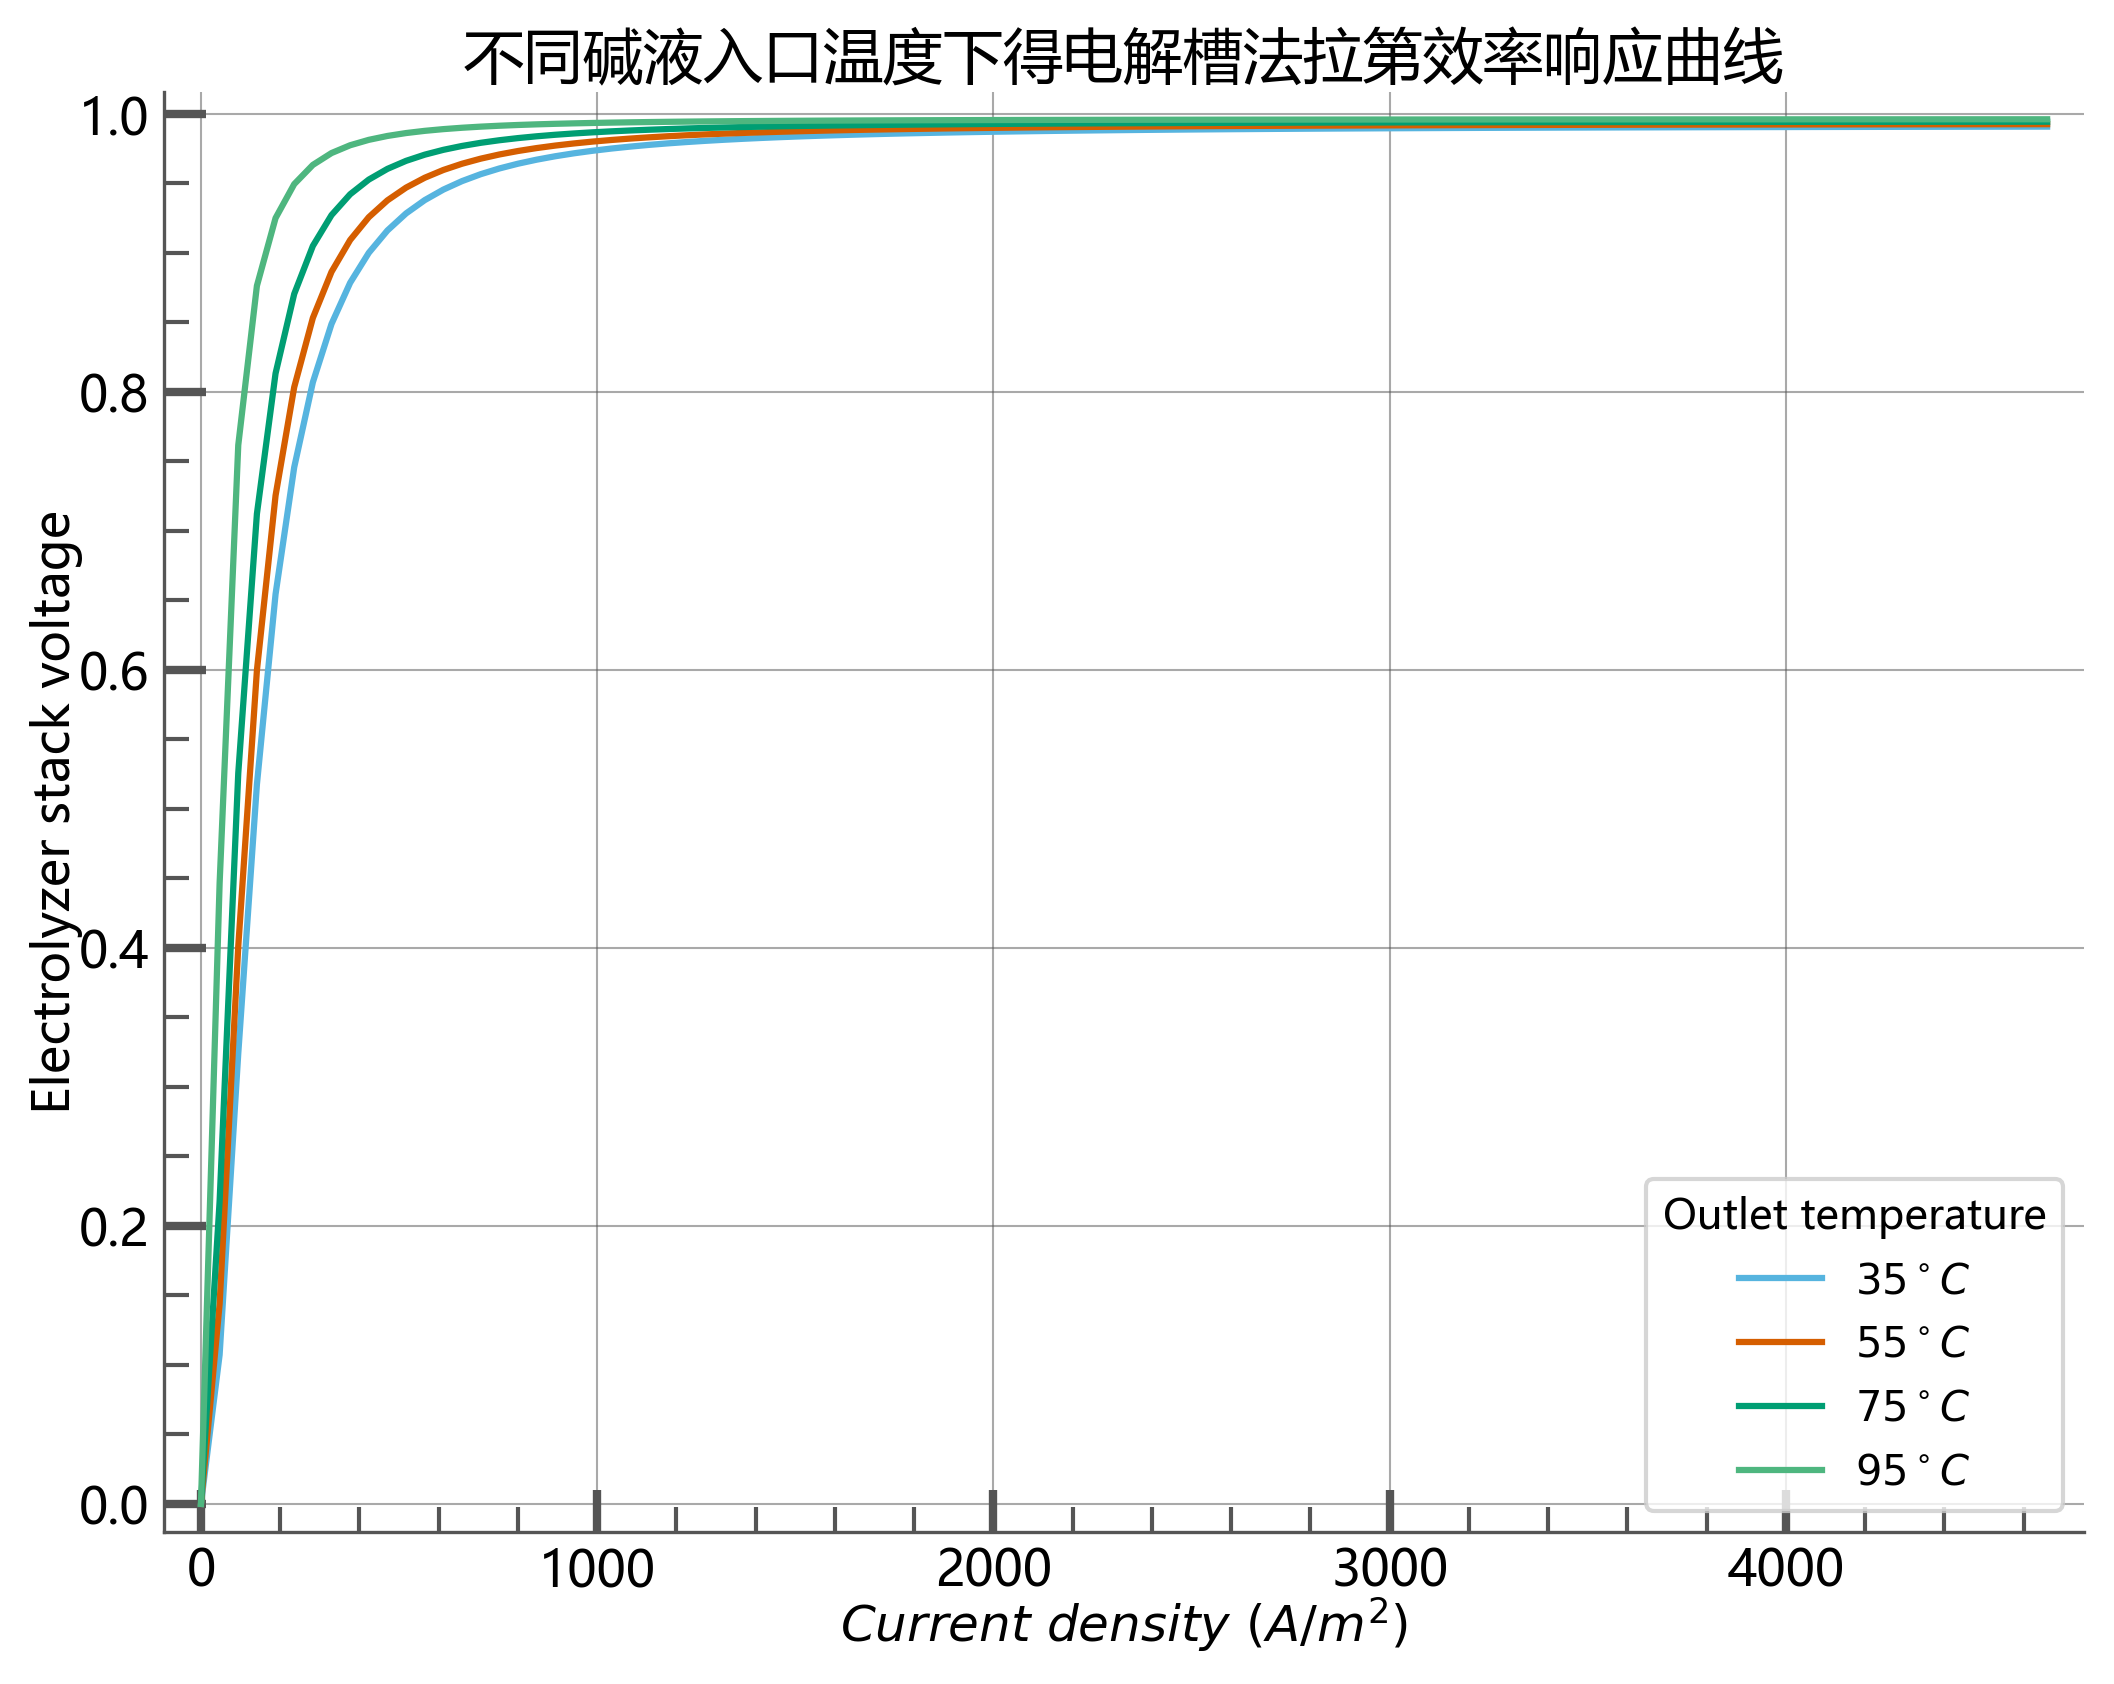

In [71]:
Model_faraday_efficiency_different_lye_temperature().save()

[35 55 75 95]


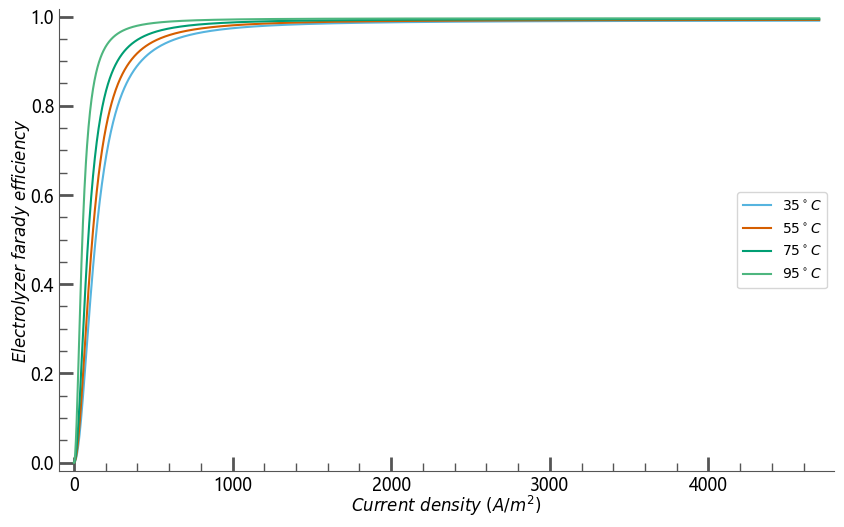

In [36]:
current_temp_farady()

In [ ]:
(
    current_list,
    voltage_list,
    power_list,
    temperature_list
) = electrolyzer.get_default_polarization()

In [ ]:
electrolyzer.temperature_thermal_balance_current(
    ambient_temperature=15,
    lye_flow=1.5,
    lye_temperature=10,
    current=0
)